# QuickStart https://python.langchain.com/v0.1/docs/use_cases/chatbots/quickstart/


#### Eco system
##### LangSmith
Evaluation and trace language model application and intelligen agents.

##### LangGraph


##### LangServer



### High level components

#### Chat model
interface thas is based around messages rather than raw text. https://python.langchain.com/v0.1/docs/modules/model_io/chat/.

A chat model is is a language model that uses messages as inputs and returns chat messages instead of plain text.
Intergrations with several LLM(openAI, Cohere, Hugging face) and exposes a common interface for all models.

You can use the models in async, sync, batching and s¨treaming mode and caching. 

##### Message types
Chat model takes a list of messages and returns a message. There are different messages but all messages has a role and content type. The role says "WHO" is saying something and LangChain has many different message classes for different roles. The *content*  property describes the content of the message. 
    - A string (most models deals with this type)
    - A dictionary with (multi-modal input) - Dictionary contains information about input type and input location
  
Type of messages
-  Human message
   - This represents message from the user.

- AIMessage
    - This represents a message from the model. This may have additional kwargs in it for example tool calls. 


- SystemMessage
   - This represnts how a model should behave. Not every model supports this. Generally only consist of content. 

- FunctionMessage
    - Represent the result a function call. Content and role but also a name paramter that represents the name of the function that was called to produce the result.
    
- TollMessage

#### Streaming
All chatmodels implements the Runnable interface

##### Tool function calling
##### Structured   output
##### Caching
##### Custom chat model
##### Get log probabilitites
##### Responses metadata
##### Tracking token usage


##### LCEL
makes it easy to build complex chains from basic components, and supports out of box functionality such as:

- streaming
- parallelism
- logging


###### Runnable interface
https://python.langchain.com/v0.1/docs/expression_language/interface/

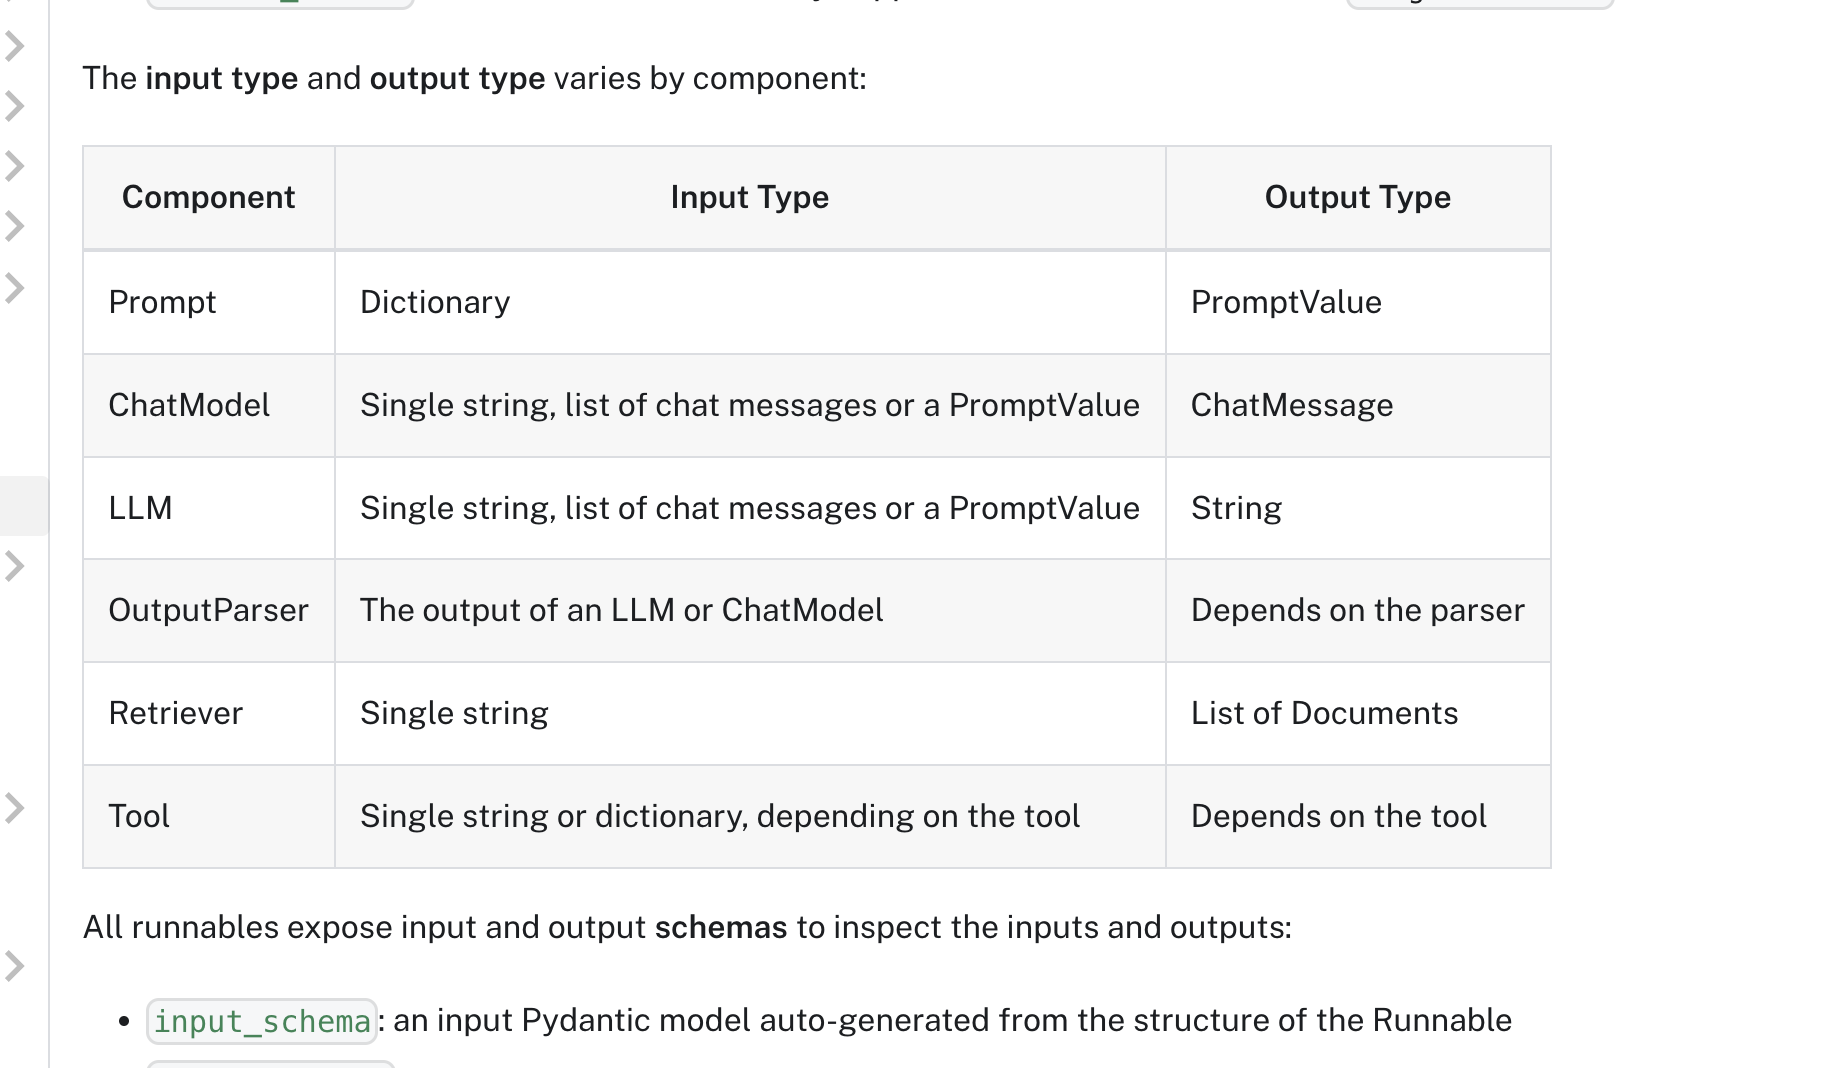


The runnable interface provides set of functions that define. Runnable interface is the core of using LCEL.
    - how tasks are executed.
    - how inouts and outputs are handled
    - how these tasks can be composed organized in a pipeline
    
 - run 
 - invoke
 - stream
 - assign
 - __or__
 - compose
 



In [1]:
# Set env var OPENAI_API_KEY or load from a .env file:
import dotenv

dotenv.load_dotenv()


True

In [2]:
from langchain_openai import ChatOpenAI

chat = ChatOpenAI(model="gpt-3.5-turbo-1106", temperature=0.2)

In [13]:
from langchain import PromptTemplate
PromptTemplate

langchain_core.prompts.prompt.PromptTemplate

In [3]:
from langchain_core.messages import HumanMessage

chat.invoke(
    [
        HumanMessage(
            content="Translate this sentence from English to French: I love programming."
        )
    ]
)

AIMessage(content="J'adore la programmation.", response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 19, 'total_tokens': 27}, 'model_name': 'gpt-3.5-turbo-1106', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-a933540e-4b78-4740-b89b-cdc41ffa51d1-0')

In [5]:
# The model on its own does not have any concept of state. For example, if you ask a followup question:

chat.invoke([HumanMessage(content="What did you just say?")])

AIMessage(content='I said, "What did you just say?"', response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 13, 'total_tokens': 23}, 'model_name': 'gpt-3.5-turbo-1106', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-f52dad28-1bc1-4b49-a4e7-11cc4b9f5f13-0')

In [6]:
from langchain_core.messages import AIMessage

chat.invoke(
    [
        HumanMessage(
            content="Translate this sentence from English to French: I love programming."
        ),
        AIMessage(content="J'adore la programmation."),
        HumanMessage(content="What did you just say?"),
    ]
)



AIMessage(content='I said "J\'adore la programmation" which means "I love programming" in French.', response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 41, 'total_tokens': 62}, 'model_name': 'gpt-3.5-turbo-1106', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-6e0c991d-db9f-4f9d-a877-16cf9b11cf70-0')

# Chain a prompt template to the chat model 
https://api.python.langchain.com/en/latest/prompts/langchain_core.prompts.chat.ChatPromptTemplate.html

In [52]:
from langchain.prompts import ChatPromptTemplate, PromptTemplate, MessagesPlaceholder
from langchain.schema import HumanMessage, AIMessage

# Define the prompt template
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant. Answer all questions to the best of your ability."),
        MessagesPlaceholder(variable_name="messages")
    ]
)

# Invoke the prompt with the messages
response = prompt.invoke(
    {
        "messages": [    
            HumanMessage(content="Translate this sentence from English to French: I love programming."),
            AIMessage(content="J'adore la programmation."),
            HumanMessage(content="What did you just say?")
        ]
    }
)


systemPrompt = PromptTemplate(input_variables=["dog"], template="Hi {dog}")
j = systemPrompt.invoke({
    "dog": "h",
})

k = ChatPromptTemplate.from_messages([
    ("system", "ypu are a nice guy {h}"),
    ("placeholder", "{conversation}")
])
k.invoke({
    "h":"h",
    "conversation": [
        ("human", "no"),
        ("system", "thats right"),
    ]

})

ChatPromptValue(messages=[SystemMessage(content='ypu are a nice guy h'), HumanMessage(content='no'), SystemMessage(content='thats right')])

# Message history
responsible for saving and loading chat history. There are many built-in message history intergrations that persists messages to a variety of databases. But let's start with an in-memory one.


In [8]:
from langchain.memory import ChatMessageHistory

In [9]:
demo_ephemeral_chat_history = ChatMessageHistory()
# demo_ephemeral_chat_history.add_user_message("Hi!")
# demo_ephemeral_chat_history.add_ai_message("whats up?")
# demo_ephemeral_chat_history.messages

chain = prompt | chat


demo_ephemeral_chat_history.add_user_message(
    "Translate this sentence from English to French: I love programming."
)
response = chain.invoke({"messages": demo_ephemeral_chat_history.messages})


### Add the response messages from the invokation to the memorystore and pass it

In [10]:
demo_ephemeral_chat_history.add_ai_message(response)
demo_ephemeral_chat_history.add_user_message("What did you say?")
chain.invoke({"messages": demo_ephemeral_chat_history.messages})


AIMessage(content='I said the translation of "I love programming" in French is "J\'adore la programmation."', response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 72, 'total_tokens': 94}, 'model_name': 'gpt-3.5-turbo-1106', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-30cf4e30-51eb-4a71-9644-e69bd8bf3c0e-0')

# Retrievers
being able to use domain-specifc, up to date knowledge as context augmented its responses

In [19]:
## load the doc into a document loader
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://docs.smith.langchain.com/overview")
data = loader.load()

In [20]:
#### split the text into smaller chunks that the LLMs context window can handle and store in a vector database
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter(chunk_size=500,chunk_overlap=0)
all_splits = text_splitter.split_documents(data)

In [13]:
# all_splits

### Embedd these chunks and store it in a vector database

In [14]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(documents=all_splits, embedding=OpenAIEmbeddings())

In [15]:
### create a retriever from the vector store
retriever = vectorstore.as_retriever(k=4)
docs = retriever.invoke("Can LangSmith help test my LLM applications?")


## Handling documents
Let's modify the previous prompt to accept documents. We will use create_stuff_docuemtns_chain. Create a chain for passing list of documents to a model.

#### create a chat and chatprompttemplate and wrape it in a create_stuff_documents

In [44]:
from langchain.chains.combine_documents import create_stuff_documents_chain

chat = ChatOpenAI(model="gpt-3.5-turbo-1106")

question_answering_prompt = ChatPromptTemplate.from_messages(
    [
        (
        "system",
        "Answer the user's questions based on the below context: \n\n{context}",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)


document_chain = create_stuff_documents_chain(chat, question_answering_prompt)

document_chain.output_schema.schema()


{'title': 'StrOutputParserOutput', 'type': 'string'}

### Let's invoke this with the messages in the chat history and the documents retrieved

In [57]:
from typing import Dict
from langchain_core.runnables import RunnablePassthrough
from langchain.memory import ChatMessageHistory

chat_history = ChatMessageHistory()
chat_history.add_user_message("How can langsmith help with testing?")


document_chain.invoke(
    {
        "messages": chat_history.messages,
        "context": docs, 
    }
)


NameError: name 'document_chain' is not defined

### Create a retrievable chain
let's pass the retriever into the chain. We want the retriever to retrieve docs based on the last message in the history.

In [58]:
from typing import Dict

def parse_retriever_input(params: Dict):
    return params["messages"][-1].content


retrieval_chain = RunnablePassthrough.assign(
    context=parse_retriever_input | retriever
).assign(
    answer=document_chain,
)

NameError: name 'retriever' is not defined

In [51]:
response = retrieval_chain.invoke(
    {
        "messages": chat_history.messages,
    }
)
response

{'messages': [HumanMessage(content='How can langsmith help with testing?')],
 'context': [Document(page_content='Get started with LangSmith | ğŸ¦œï¸�ğŸ›\xa0ï¸� LangSmith', metadata={'description': 'LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!', 'language': 'en', 'source': 'https://docs.smith.langchain.com/overview', 'title': 'Get started with LangSmith | ğŸ¦œï¸�ğŸ›\xa0ï¸� LangSmith'}),
  Document(page_content='Skip to main contentLangSmith API DocsSearchGo to AppQuick startTutorialsHow-to guidesConceptsReferencePricingSelf-hostingQuick startOn this pageGet started with LangSmithLangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary 

In [56]:
## Let's add the last message to chat history
chat_history.add_ai_message(response['answer'])
chat_history.add_user_message('tell me more about that')
retrieval_chain.invoke(
    {
        "messages": chat_history.messages,
    }
)

{'messages': [HumanMessage(content='How can langsmith help with testing?'),
  AIMessage(content='LangSmith can help with testing by allowing you to closely monitor and evaluate your application, so you can ship quickly and with confidence. It provides a platform for building production-grade LLM (Language Model) applications, and provides multiple ways to log traces and run evaluations. By using LangSmith, you can ensure that your application is thoroughly tested and performant before deployment.'),
  AIMessage(content='LangSmith can help with testing by allowing you to closely monitor and evaluate your application, so you can ship quickly and with confidence. It provides a platform for building production-grade LLM (Language Model) applications, and provides multiple ways to log traces and run evaluations. By using LangSmith, you can ensure that your application is thoroughly tested and performant before deployment.'),
  HumanMessage(content='tell me more about that'),
  AIMessage(con

## Query transformation